<a href="https://colab.research.google.com/github/mukund2124/Object-Detection-with-PyTorch-YOLO---THP/blob/main/Robot_Parts_Object_Detection_using_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the required packages
!pip install ultralytics  # YOLOv8 library
!pip install torch torchvision

from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 24.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="bSYJZsIhVQt5mLTUTz1B")
project = rf.workspace("mukund-2ndyr").project("robotic-object-detection")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8m.pt')  # 'n' is for the nano version, choose 's', 'm', 'l', or 'x' for other sizes

# Train the model
results = model.train(
    data='/content/Robotic-object-detection-1/data.yaml',  # Path to the data.yaml file
    epochs=40,                              # Number of epochs to train for
    imgsz=640,                              # Image size for training
    batch=32,                               # Batch size
    name='custom_yolov8_model'              # Name for the training run
)


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Robotic-object-detection-1/data.yaml, epochs=40, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 20.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 114MB/s]


AMP: checks passed ✅


train: Scanning /content/Robotic-object-detection-1/train/labels... 516 images, 155 backgrounds, 0 corrupt: 100%|██████████| 516/516 [00:00<00:00, 1852.17it/s]


train: New cache created: /content/Robotic-object-detection-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 266, len(boxes) = 389. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Robotic-object-detection-1/valid/labels... 80 images, 11 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 1297.03it/s]

val: New cache created: /content/Robotic-object-detection-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 42, len(boxes) = 72. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/custom_yolov8_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/custom_yolov8_model2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      13.5G      1.016      3.883      1.517          4        640: 100%|██████████| 17/17 [00:17<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all         80         72       0.25       0.49      0.229     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      13.5G      1.069      2.097      1.519          7        640: 100%|██████████| 17/17 [00:15<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         80         72     0.0915      0.414     0.0625     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      13.5G      1.419      2.107      1.745          3        640: 100%|██████████| 17/17 [00:16<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         80         72    0.00592     0.0333    0.00315    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      13.1G      1.463      2.044      1.786          6        640: 100%|██████████| 17/17 [00:15<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         80         72     0.0077     0.0444    0.00338   0.000644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      13.5G      1.497      2.084      1.826         10        640: 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         80         72     0.0262      0.415     0.0144    0.00428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      13.2G      1.445      1.971      1.748          7        640: 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         80         72     0.0109      0.809     0.0128    0.00394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      13.5G      1.442      1.931      1.766          9        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         80         72    0.00162      0.225    0.00192    0.00056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      13.2G      1.508      1.949      1.788          5        640: 100%|██████████| 17/17 [00:16<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         80         72      0.126      0.187     0.0136    0.00523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      13.5G      1.429      1.819      1.754          4        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         80         72          1     0.0833      0.101     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      13.2G      1.432      1.865      1.723          5        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         80         72      0.112      0.398      0.112     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      13.5G      1.358      1.679      1.662          7        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         80         72     0.0643      0.103     0.0213    0.00821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      13.1G       1.26      1.621      1.611         10        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         80         72      0.493      0.288        0.2     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      13.5G      1.284        1.7      1.651          6        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         80         72      0.821      0.411      0.572      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      13.1G       1.17      1.496      1.552          5        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         80         72      0.371      0.498      0.537      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      13.5G      1.221      1.445      1.579          9        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         80         72      0.736        0.5      0.548      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      13.1G       1.17      1.386      1.544          6        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         80         72      0.513      0.385      0.468      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      13.5G      1.118      1.356      1.508          8        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         80         72      0.502       0.68      0.598      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      13.1G      1.121      1.359      1.511          8        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         80         72      0.417      0.658      0.505       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      13.5G      1.056      1.241      1.461          6        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         80         72      0.676      0.381      0.466      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      13.1G      1.092      1.302      1.483         10        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         80         72      0.762      0.406      0.581      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      13.5G      1.071      1.254      1.452          8        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         80         72      0.566      0.657        0.6      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      13.1G      1.024      1.169      1.434          9        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         80         72      0.582      0.711      0.584      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      13.5G      1.003      1.157      1.419          9        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         80         72      0.495      0.561      0.523      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      13.2G     0.9809      1.138      1.418          5        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         80         72      0.427      0.716      0.659       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      13.5G     0.9716      1.179      1.392          4        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         80         72      0.645      0.734      0.736      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      13.2G     0.9319      1.111      1.379          9        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         80         72      0.631      0.695      0.796      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      13.5G     0.9526      1.067      1.408          8        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         80         72      0.515       0.77      0.669      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      13.1G     0.9214      1.068      1.358          7        640: 100%|██████████| 17/17 [00:16<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         80         72      0.558      0.731      0.704      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      13.5G     0.8804      1.011      1.339         11        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         80         72      0.708      0.786       0.76       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      13.1G     0.8625      0.932      1.335         10        640: 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         80         72      0.683      0.768      0.813      0.532


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      13.5G     0.7737     0.9843      1.353          2        640: 100%|██████████| 17/17 [00:19<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         80         72      0.545      0.771      0.723      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      13.2G     0.7692     0.8602      1.366          3        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         80         72      0.699       0.63      0.772      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      13.5G     0.7386     0.7222      1.344          3        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         80         72       0.73      0.774      0.798      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      13.1G     0.6984     0.6883      1.241          3        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         80         72      0.691      0.721      0.817       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      13.5G     0.6911     0.6838      1.274          4        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         80         72      0.725      0.777      0.854       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      13.1G     0.6713     0.6392      1.289          2        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         80         72       0.75      0.852      0.861      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      13.5G     0.6314     0.6865       1.25          2        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         80         72      0.815      0.772      0.849      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      13.1G     0.5959     0.5679      1.189          2        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         80         72      0.778      0.752      0.831      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      13.5G     0.5413     0.5286      1.145          5        640: 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         80         72      0.766      0.766      0.847      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      13.1G      0.547     0.5386      1.156          3        640: 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         80         72      0.751      0.755      0.864      0.623



40 epochs completed in 0.220 hours.
Optimizer stripped from runs/detect/custom_yolov8_model2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/custom_yolov8_model2/weights/best.pt, 52.0MB

Validating runs/detect/custom_yolov8_model2/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


                   all         80         72      0.752      0.755      0.864      0.623
               battery          4          4      0.564          1      0.995      0.908
                camera         30         30      0.772      0.667        0.8      0.459
                robots         35         38      0.919      0.599      0.798      0.501
Speed: 0.2ms preprocess, 9.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/custom_yolov8_model2


lr/pg0,▂▃▅▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▃▅▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▃▅▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▃▁▁▁▁▁▁▁▂▂▁▃▆▅▅▅▆▅▅▆▆▆▅▆▇▇▆▇▇█▇▇▇███████
metrics/mAP50-95(B),▂▁▁▁▁▁▁▁▂▁▁▂▅▃▅▃▅▄▄▅▅▄▅▆▆▇▆▆▆▇▆▇▇▇▇▇██▇█
metrics/precision(B),▃▂▁▁▁▁▁▂█▂▁▄▇▄▆▅▅▄▆▆▅▅▄▄▆▅▅▅▆▆▅▆▆▆▆▆▇▆▆▆
metrics/recall(B),▅▄▁▁▄█▃▂▁▄▂▃▄▅▅▄▇▆▄▄▆▇▆▇▇▇▇▇▇▇▇▆▇▇▇█▇▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▄▅▇█████▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Robotic-object-detection-1/valid/labels.cache... 80 images, 11 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 42, len(boxes) = 72. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


                   all         80         72      0.751      0.755      0.864      0.623
               battery          4          4      0.564          1      0.995      0.908
                camera         30         30      0.769      0.667        0.8      0.459
                robots         35         38      0.919        0.6      0.798      0.501
Speed: 0.4ms preprocess, 21.2ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/val9


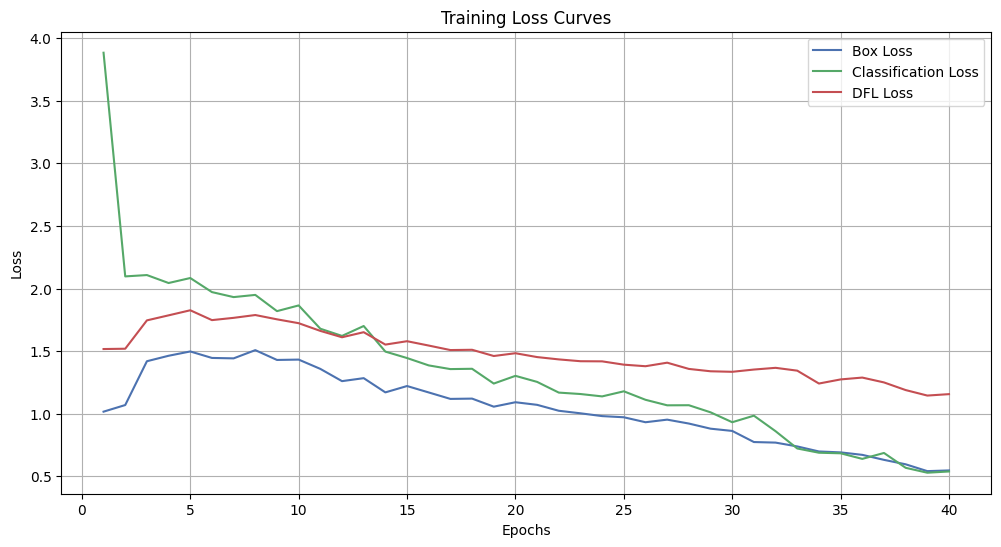

Results structure: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed', 'task']


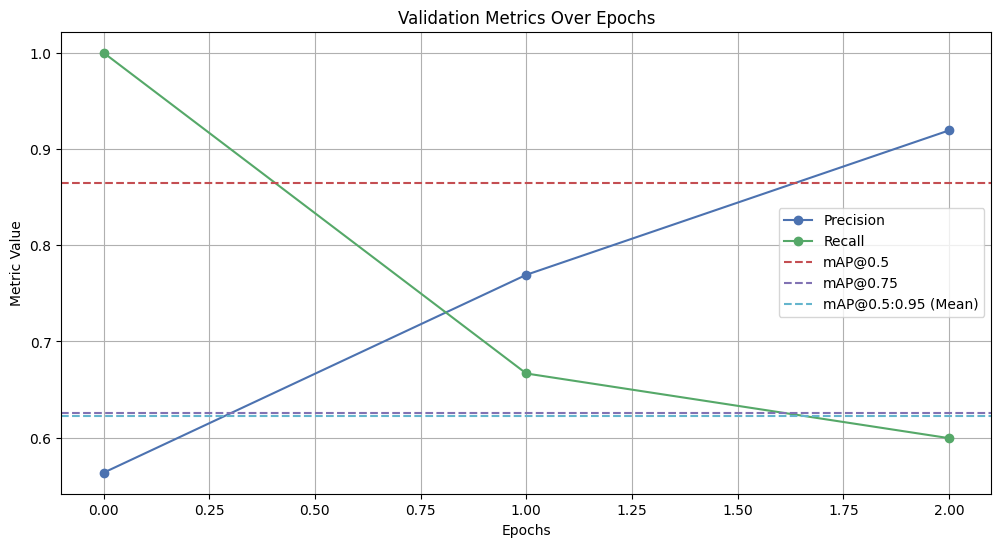

AttributeError: 'ConfusionMatrix' object has no attribute 'astype'

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from ultralytics import YOLO

# Load the trained YOLOv8 model
model_path = 'runs/detect/custom_yolov8_model2/weights/best.pt'  # Path to your trained model weights
model = YOLO(model_path)

# Perform validation to get performance metrics
results = model.val()

# Function to plot training loss curves for analysis
def plot_training_loss(metrics_dir='runs/detect/custom_yolov8_model2/results.csv'):
    """
    Plots training losses (box_loss, cls_loss, dfl_loss) over the epochs.
    """
    # Load training metrics from the results.csv file
    metrics = pd.read_csv(metrics_dir)

    epochs = metrics['epoch'].values
    box_loss = metrics['train/box_loss'].values
    cls_loss = metrics['train/cls_loss'].values
    dfl_loss = metrics['train/dfl_loss'].values

    # Plot the loss curves
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, box_loss, label='Box Loss', color='b')
    plt.plot(epochs, cls_loss, label='Classification Loss', color='g')
    plt.plot(epochs, dfl_loss, label='DFL Loss', color='r')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Curves')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot validation metrics
def plot_validation_metrics(results):
    """
    Plots validation metrics such as Precision, Recall, mAP@0.5, and mAP@0.5:0.95.
    """
    # Access metrics directly
    precision = results.box.p  # Precision for each class
    recall = results.box.r      # Recall for each class
    map50 = results.box.map50    # Mean AP at IoU threshold of 0.5
    map75 = results.box.map75    # Mean AP at IoU threshold of 0.75
    mean_ap = results.box.map     # Mean AP at IoU thresholds from 0.5 to 0.95

    # If the results are not structured as expected, print the structure
    print("Results structure:", dir(results))

    epochs = np.arange(len(precision))

    # Plot the metrics
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, precision, label='Precision', color='b', marker='o')
    plt.plot(epochs, recall, label='Recall', color='g', marker='o')
    plt.axhline(y=map50, color='r', linestyle='--', label='mAP@0.5')
    plt.axhline(y=map75, color='m', linestyle='--', label='mAP@0.75')
    plt.axhline(y=mean_ap, color='c', linestyle='--', label='mAP@0.5:0.95 (Mean)')
    plt.xlabel('Epochs')
    plt.ylabel('Metric Value')
    plt.title('Validation Metrics Over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

# Function to generate and plot the confusion matrix
def plot_confusion_matrix(results):
    """
    Plots a confusion matrix using seaborn heatmap.
    """
    confusion_matrix = results.confusion_matrix
    classes = results.names

    # Normalize the confusion matrix
    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='.2f')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Normalized Confusion Matrix')
    plt.show()

# Generate Precision-Recall curve
def plot_pr_curve(results):
    """
    Plots the Precision-Recall curve.
    """
    precision_curves = results.box.ap()  # mAP for all classes
    recall_curves = results.box.r

    plt.figure(figsize=(12, 6))
    for i, prec in enumerate(precision_curves):
        plt.plot(recall_curves[i], prec, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Main function to generate the entire report
def generate_model_report():
    """
    Generates a comprehensive report of the model's performance.
    """
    # Plot training losses
    plot_training_loss()

    # Plot validation metrics
    plot_validation_metrics(results)

    # Plot confusion matrix
    plot_confusion_matrix(results)

    # Plot Precision-Recall curve
    plot_pr_curve(results)
    print("Model Performance Report Generated.")

# Generate the report
generate_model_report()
